Els cinc grans trets de personalitat, també coneguts com el model de cinc factors (FFM) i el model OCEAN, és una taxonomia, o agrupació, per als trets de personalitat. Quan s'aplica l'anàlisi de factors (una tècnica estadística) a les dades de l'enquesta de personalitat, algunes paraules utilitzades per descriure aspectes de la personalitat s'apliquen sovint a la mateixa persona. Per exemple, és més probable que algú descrit com a conscient sigui descrit com "sempre preparat" en lloc de "maldestre". Aquesta teoria es basa, per tant, en l'associació entre paraules però no en experiments neuropsicològics. Aquesta teoria utilitza descriptors del llenguatge comú i, per tant, suggereix cinc grans dimensions comunament utilitzades per descriure la personalitat humana i la psique.

La idea és que amb aquest conjunt de dades, que conté respostes de 1-5 (1=Desgrau, 3=Neutral, 5=Acord) a diverses preguntes, es classifiqui cada persona segons els 5 trets del model Big Five, utilitzant un enfocament de classificació que agrupa les persones en categories en funció de les seves puntuacions. Per a això, definirem un llindar per a quantificar la presència de cada tret de personalitat en diferents individus: Baix, Mitjà, Alt. Com quantificarem aquest llindar? Utilitzant percentils. Per exemple, una puntuació d'Extroversió , 75 indicaria Alta Extroversió.

Els trets de personalitat corresponen al model dels "Big Five":<br>
    EXT: Extraversió.<br>
    EST: Estabilitat emocional (Neuroticismo invers).<br>
    AGR: Amabilitat.<br>
    CSN: Escrupolositat.<br>
    OPN: Obertura a l'experiència.<br>

1. LIBRARIES IMPORTATION AND DATA READING

In [28]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, confusion_matrix, ConfusionMatrixDisplay, average_precision_score, precision_recall_curve, auc, roc_curve, roc_auc_score

# Análisis de componentes principales (PCA)
from sklearn.decomposition import PCA

# Estadísticas
import statsmodels.api as sm


In [29]:
dataset = pd.read_csv(f'C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/data-final.csv', delimiter='\t', encoding='utf-8')

In [30]:
print("\nMirem descripció general:")
dataset.describe()


Mirem descripció general:


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013275e+06,1.013275e+06,1.013275e+06,1.013558e+06,1.015341e+06,1.015341e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149510e+03,8.262611e+02,9.590748e+02,6.754233e+02,2.701410e+03,1.045211e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05,5.600884e+02,1.802490e+02,5.104005e+04,2.017864e+04,1.483898e+06,3.982879e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [31]:
print("Número d'atributs del dataset:", len(dataset.keys()))
print("Número de files en el dataset: ",dataset.shape[0])

print("\nAtributs del dataset i el seu tipus:")
print (dataset.dtypes) 

Número d'atributs del dataset: 110
Número de files en el dataset:  1015341

Atributs del dataset i el seu tipus:
EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object


Com realment no queda clar quin és el significat de cada atribut, crearem un algorisme amb el qual l'usuari pugui comprovar que vol dir cadascun d'ells

In [32]:
# Clean text from invisible characters
def cleaning(text):
    # Replace tabs and other invisible characters with spaces
    return text.replace("\t", " ").replace("\n", " ").strip()

# Load the questions and their descriptions into a dictionary
def questions(file):
    qts = {}
    with open(file, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                clean_line = cleaning(line)
                # Split by spaces or tabs to get key and description
                sections = clean_line.split(maxsplit=1)
                if len(sections) == 2:
                    key, description = sections
                    qts[key.strip()] = description.strip()  # Normalize spaces
    return qts

# Look up the meaning of a key
def meaning(questions):
    while True:
        keys = input("Enter the key that you want to know (or type 'leave' to finish): ").strip()
        if keys.lower() == 'leave':
            print("Search finished.")
            break
        elif keys in questions:
            print(f"{keys}: {questions[keys]}")
        else:
            print(f"The key '{keys}' is not in the file. Please try again.")

# Path to the Questions.txt file
file = "C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/Questions.txt"

try:
    # Load the questions
    questions = questions(file)
    print("The questions have been loaded successfully.")
    # Start the interactive search
    meaning(questions)
except FileNotFoundError:
    print(f"The file '{file}' was not found.")
except Exception as e:
    print(f"Error: {e}")


The questions have been loaded successfully.
Search finished.


In [33]:
numeric_features = dataset.select_dtypes(np.number).keys()
non_numeric = [k for k in dataset.keys() if k not in numeric_features]
print("Numeric features: ", numeric_features)
print("Non numeric features: ", non_numeric)
print(dataset[non_numeric].dtypes)

Numeric features:  Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'screenw', 'screenh',
       'introelapse', 'testelapse', 'endelapse', 'IPC'],
      dtype='object', length=106)
Non numeric features:  ['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']
dateload                 object
country                  object
lat_appx_lots_of_err     object
long_appx_lots_of_err    object
dtype: object


Miraremos de hacer el cambio de las variables categóricas a numéricas

In [ ]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar el LabelEncoder a la columna 'country'
dataset['country'] = le.fit_transform(dataset['country'])

# Convertir las columnas 'lat_appx_lots_of_err' y 'long_appx_lots_of_err' a tipo numérico
# Usamos pd.to_numeric() para manejar valores no numéricos, convirtiéndolos a NaN si es necesario

dataset['lat_appx_lots_of_err'] = pd.to_numeric(dataset['lat_appx_lots_of_err'], errors='coerce')
dataset['long_appx_lots_of_err'] = pd.to_numeric(dataset['long_appx_lots_of_err'], errors='coerce')

#fusionem les variables per crear el tamany de pantalla
dataset['screen_size'] = dataset['screenh'] * dataset['screenw']
dataset.drop(columns=['screenw', 'screenh'], inplace=True)
dataset.head()

# Extraer el tiempo (HH:MM:SS) de la columna 'dateload'
dataset['dateload_spent'] = dataset['dateload'].str.split(' ').str[1]

# Convertir 'dateload_time' en segundos
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

dataset['dateload_time'] = dataset['dateload_spent'].apply(time_to_seconds)

# Eliminar las columnas innecesarias
dataset.drop(columns=['dateload', 'dateload_spent'], inplace=True)

dataset.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN10_E,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,screen_size,dateload_time
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4354.0,9.0,234.0,6,1,69,51.5448,0.1991,786432.0,7261
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,3019.0,12.0,179.0,11,1,144,3.1698,101.7060,1044480.0,7280
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2529.0,3.0,186.0,7,1,69,54.9119,-1.3833,1049088.0,7316
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3257.0,186.0,219.0,7,1,69,51.7500,-1.2500,2304000.0,7322
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,8642.0,8.0,315.0,17,2,103,1.0000,38.0000,1049088.0,7377


In [35]:
# Imprimir las columnas con NaNs
nan_columns = dataset.columns[dataset.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum())

# Imprimir el porcentaje de NaNs por columna
print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum() / len(dataset) * 100)

# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Imprimir columnas sin NaNs
print("\nCOLUMNAS SIN NANS:")
print(non_nan_columns)


NÚMERO DE NANS POR COLUMNA:
EXT1                      1783
EXT2                      1783
EXT3                      1783
EXT4                      1783
EXT5                      1783
                         ...  
introelapse               2066
testelapse                1783
lat_appx_lots_of_err     13728
long_appx_lots_of_err    13728
screen_size               2066
Length: 105, dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
EXT1                     0.175606
EXT2                     0.175606
EXT3                     0.175606
EXT4                     0.175606
EXT5                     0.175606
                           ...   
introelapse              0.203478
testelapse               0.175606
lat_appx_lots_of_err     1.352058
long_appx_lots_of_err    1.352058
screen_size              0.203478
Length: 105, dtype: float64

COLUMNAS SIN NANS:
['endelapse', 'IPC', 'country', 'dateload_time']


Hi ha molts Nans, per tant més endavant haurem de fer canvis. principalment el que farem serà dividir en blocs diferents depenen del significat de la columna. També haurem de comprovar que en les 50 columnes que representen els enunciats als quals los enquestats responen, sol hagi valors del 1-5.

In [36]:
# Lista de las 50 columnas a comprobar (ya proporcionada en tu mensaje)
columns_bloc1 = ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",
           "EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10",
           "AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10",
           "CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10",
           "OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]

# Verificar si todos los valores en las columnas están dentro del rango [1, 2, 3, 4, 5]
# Mostrar los valores únicos de cada columna
unique_values_summary = {col: dataset[col].unique() for col in columns_bloc1}

# Mostrar los valores únicos de cada columna
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)


Columna: EXT1
Valores únicos: [ 4.  3.  2.  1.  5.  0. nan]
----------------------------------------
Columna: EXT2
Valores únicos: [ 1.  5.  3.  2.  4.  0. nan]
----------------------------------------
Columna: EXT3
Valores únicos: [ 5.  3.  4.  2.  1.  0. nan]
----------------------------------------
Columna: EXT4
Valores únicos: [ 2.  4.  3.  5.  1.  0. nan]
----------------------------------------
Columna: EXT5
Valores únicos: [ 5.  3.  4.  2.  1.  0. nan]
----------------------------------------
Columna: EXT6
Valores únicos: [ 1.  3.  2.  5.  4.  0. nan]
----------------------------------------
Columna: EXT7
Valores únicos: [ 5.  2.  1.  3.  4.  0. nan]
----------------------------------------
Columna: EXT8
Valores únicos: [ 2.  5.  3.  4.  1.  0. nan]
----------------------------------------
Columna: EXT9
Valores únicos: [ 4.  1.  2.  3.  5.  0. nan]
----------------------------------------
Columna: EXT10
Valores únicos: [ 1.  5.  4.  3.  2.  0. nan]
------------------------------

Usarem la moda per imputer els valors faltants, ja que així respectem la naturalesa ordinal de les dades, també mantenim valors que realment estan dins del rang [1, 5] i fins i tot evitem introduir biaixos numèrics o inconsistències.

In [37]:
# Reemplazar los valores 0 por NaN en todo el dataset
dataset.replace(0, np.nan, inplace=True)

# Imputación simple
imputer_mode = SimpleImputer(strategy='most_frequent')  # Para valores numéricos
dataset.loc[:, columns_bloc1] = imputer_mode.fit_transform(dataset[columns_bloc1])

# Verificar la proporción de NaNs
# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Mostrar los valores únicos de cada columna
unique_values_summary = {col: dataset[col].unique() for col in columns_bloc1}

# Mostrar los valores únicos de cada columna
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)
    

Columna: EXT1
Valores únicos: [4. 3. 2. 1. 5.]
----------------------------------------
Columna: EXT2
Valores únicos: [1. 5. 3. 2. 4.]
----------------------------------------
Columna: EXT3
Valores únicos: [5. 3. 4. 2. 1.]
----------------------------------------
Columna: EXT4
Valores únicos: [2. 4. 3. 5. 1.]
----------------------------------------
Columna: EXT5
Valores únicos: [5. 3. 4. 2. 1.]
----------------------------------------
Columna: EXT6
Valores únicos: [1. 3. 2. 5. 4.]
----------------------------------------
Columna: EXT7
Valores únicos: [5. 2. 1. 3. 4.]
----------------------------------------
Columna: EXT8
Valores únicos: [2. 5. 3. 4. 1.]
----------------------------------------
Columna: EXT9
Valores únicos: [4. 1. 2. 3. 5.]
----------------------------------------
Columna: EXT10
Valores únicos: [1. 5. 4. 3. 2.]
----------------------------------------
Columna: EST1
Valores únicos: [1. 2. 4. 3. 5.]
----------------------------------------
Columna: EST2
Valores únicos: [

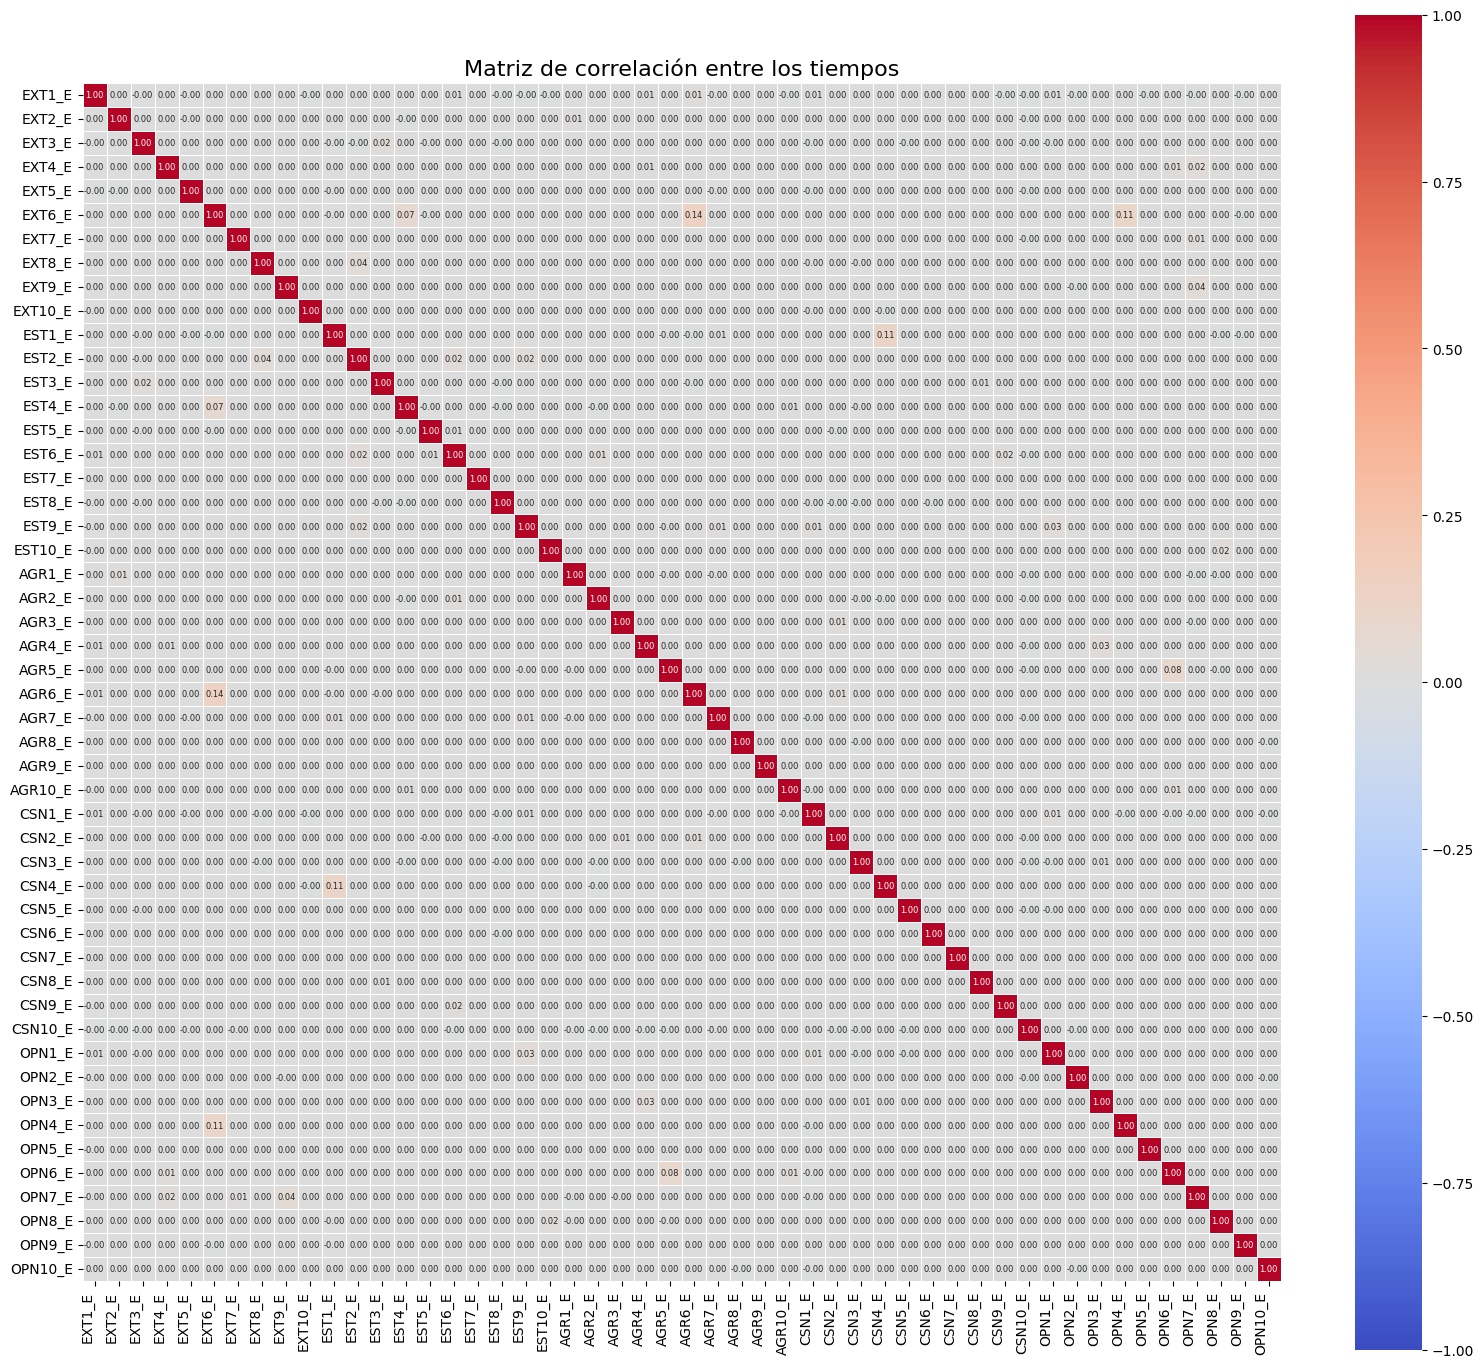

In [38]:
# Llista de les columnes a tractar
columns_bloc_temps = [
    "EXT1_E", "EXT2_E", "EXT3_E", "EXT4_E", "EXT5_E", "EXT6_E", "EXT7_E", "EXT8_E", "EXT9_E", "EXT10_E",
    "EST1_E", "EST2_E", "EST3_E", "EST4_E", "EST5_E", "EST6_E", "EST7_E", "EST8_E", "EST9_E", "EST10_E",
    "AGR1_E", "AGR2_E", "AGR3_E", "AGR4_E", "AGR5_E", "AGR6_E", "AGR7_E", "AGR8_E", "AGR9_E", "AGR10_E",
    "CSN1_E", "CSN2_E", "CSN3_E", "CSN4_E", "CSN5_E", "CSN6_E", "CSN7_E", "CSN8_E", "CSN9_E", "CSN10_E",
    "OPN1_E", "OPN2_E", "OPN3_E", "OPN4_E", "OPN5_E", "OPN6_E", "OPN7_E", "OPN8_E", "OPN9_E", "OPN10_E"]

# Seleccionar las columnas de interés
data_temps = dataset[columns_bloc_temps]

# Calcular la matriz de correlación
correlation_matrix = data_temps.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(16, 14))  # Ajustar tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5,
            square=True, vmin=-1, vmax=1, annot_kws={'size': 6})  # Ajustar el tamaño de los números

# Mejorar la legibilidad de las etiquetas
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Rotar las etiquetas del eje Y

# Título y mostrar el gráfico
plt.title("Matriz de correlación entre los tiempos", fontsize=16)
plt.tight_layout()  # Asegura que todo se vea correctamente
plt.show()

Podem afirmar que no hi ha cap tipus de correlació de los temps de resposta, doncs per tractar els Nans usarem ImputacióSimple altre cop, però com els temps de resposta poden variar significativament entre els participants, en lloc de usar la moda usarem la imputació per mitjana ja que garanteix que els valors imputats no es vegin esbiaixats per temps extrems, preservant així l'estabilitat de les dades.

In [39]:
# Imputación simple
imputer_mode = SimpleImputer(strategy='median')  # Para valores numéricos
dataset.loc[:, columns_bloc_temps] = imputer_mode.fit_transform(dataset[columns_bloc_temps])

In [40]:
# Imprimir las columnas con NaNs
nan_columns = dataset.columns[dataset.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum())

# Imprimir el porcentaje de NaNs por columna
print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum() / len(dataset) * 100)

# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Imprimir columnas sin NaNs
print("\nCOLUMNAS SIN NANS:")
print(non_nan_columns)

NÚMERO DE NANS POR COLUMNA:
introelapse               2096
testelapse                1783
country                     17
lat_appx_lots_of_err     13731
long_appx_lots_of_err    13733
screen_size               4790
dateload_time                6
dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
introelapse              0.206433
testelapse               0.175606
country                  0.001674
lat_appx_lots_of_err     1.352354
long_appx_lots_of_err    1.352551
screen_size              0.471763
dateload_time            0.000591
dtype: float64

COLUMNAS SIN NANS:
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E',

Estrategia que seguiremos para imputar los valores:<br>

introelapse: Imputación por mediana	Preserva la tendencia central en tiempos de respuesta.<br>

testelapse:	Imputación por mediana	Robustez frente a valores extremos en tiempos.<br>

country:	Imputación por moda	La proporción de NaNs es muy baja y es una variable categórica.<br>

lat_appx_lots_of_err:	Eliminar columna	Datos imprecisos y no confiables, además de tener poca utilidad analítica.<br>
long_appx_lots_of_err:	Eliminar columna	Mismo caso que lat_appx_lots_of_err.<br>

screen_size:	Imputación por mediana	Consistente con la naturaleza de distribuciones de tamaños de pantalla.<br>

dateload_seconds:	Imputación por mediana	Valores faltantes mínimos; la imputación asegura consistencia.<br>

In [41]:
# Blocs de atributs
columns_bloc_median = ["introelapse", "testelapse", "screen_size", "dateload_time"]
columns_bloc_moda = ["country"]

# Imputación simple

# mediana
imputer_median2 = SimpleImputer(strategy='median')  # Para valores numéricos
dataset.loc[:, columns_bloc_median] = imputer_median2.fit_transform(dataset[columns_bloc_median])

#moda
imputer_moda = SimpleImputer(strategy='median')  # Para valores numéricos
dataset.loc[:, columns_bloc_moda] = imputer_moda.fit_transform(dataset[columns_bloc_moda])

# Eliminar las columnas lat_appx_lots_of_err y long_appx_lots_of_err
dataset = dataset.drop(columns=['lat_appx_lots_of_err', 'long_appx_lots_of_err'])

# Verificar que las columnas han sido eliminadas
dataset.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse,IPC,country,screen_size,dateload_time
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3116.0,2992.0,4354.0,9.0,234.0,6,1,69.0,786432.0,7261.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,3374.0,3096.0,3019.0,12.0,179.0,11,1,144.0,1044480.0,7280.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,6295.0,1585.0,2529.0,3.0,186.0,7,1,69.0,1049088.0,7316.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4192.0,3480.0,3257.0,186.0,219.0,7,1,69.0,2304000.0,7322.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5320.0,11401.0,8642.0,8.0,315.0,17,2,103.0,1049088.0,7377.0


Ahora procederemos a normalizar las columnas, empezaremos con todos los atributos menos las respuestas a las cuestiones.

In [42]:
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas numéricas a normalizar
columns_to_normalize = ["EXT1_E", "EXT2_E", "EXT3_E", "EXT4_E", "EXT5_E", "EXT6_E", "EXT7_E", "EXT8_E", "EXT9_E", "EXT10_E",
                      "EST1_E", "EST2_E", "EST3_E", "EST4_E", "EST5_E", "EST6_E", "EST7_E", "EST8_E", "EST9_E", "EST10_E",
                      "AGR1_E", "AGR2_E", "AGR3_E", "AGR4_E", "AGR5_E", "AGR6_E", "AGR7_E", "AGR8_E", "AGR9_E", "AGR10_E",
                      "CSN1_E", "CSN2_E", "CSN3_E", "CSN4_E", "CSN5_E", "CSN6_E", "CSN7_E", "CSN8_E", "CSN9_E", "CSN10_E",
                      "OPN1_E", "OPN2_E", "OPN3_E", "OPN4_E", "OPN5_E", "OPN6_E", "OPN7_E", "OPN8_E", "OPN9_E", "OPN10_E",
                      "introelapse", "testelapse", "endelapse", "IPC", "country", "screen_size", "dateload_time"]

# Crear el escalador
scaler = StandardScaler()

# Normalizar los datos (se aplicará a las columnas seleccionadas)
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

# Ahora, las columnas seleccionadas están normalizadas
dataset.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse,IPC,country,screen_size,dateload_time
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,-0.008906,-0.007837,-0.002266,-0.018595,-0.021856,-0.001816,-0.237319,-1.170041,-0.356226,-1.691027
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,-0.007924,-0.007595,-0.005297,-0.018537,-0.024584,-0.001813,-0.237319,-0.123745,0.026723,-1.690170
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,0.003194,-0.011113,-0.006410,-0.018713,-0.024237,-0.001816,-0.237319,-1.170041,0.033562,-1.688546
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,-0.004810,-0.006701,-0.004757,-0.015124,-0.022600,-0.001816,-0.237319,-1.170041,1.895880,-1.688276
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,-0.000517,0.011741,0.007470,-0.018615,-0.017838,-0.001809,-0.212211,-0.695720,0.033562,-1.685795


In [ ]:
def classify_personality(score):
    if score < 2.75:  
        return "Baja"
    elif 2.75 <= score <= 3.25:  
        return "Media"
    else:  
        return "Alta"


# Crear columnas de promedio por rasgo
dataset['EXT_avg'] = dataset[["EXT1", "EXT2", "EXT3", "EXT4", "EXT5",
                              "EXT6", "EXT7", "EXT8", "EXT9", "EXT10"]].mean(axis=1)
dataset['EST_avg'] = dataset[["EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10"]].mean(axis=1)
dataset['AGR_avg'] = dataset[["AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10"]].mean(axis=1)
dataset['CSN_avg'] = dataset[["CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10"]].mean(axis=1)
dataset['OPN_avg'] = dataset[["OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]].mean(axis=1)

# Aplicar clasificación
dataset['EXT_class'] = dataset['EXT_avg'].apply(lambda x: classify_personality(x))
dataset['EST_class'] = dataset['EST_avg'].apply(lambda x: classify_personality(x))
dataset['AGR_class'] = dataset['AGR_avg'].apply(lambda x: classify_personality(x))
dataset['CSN_class'] = dataset['CSN_avg'].apply(lambda x: classify_personality(x))
dataset['OPN_class'] = dataset['OPN_avg'].apply(lambda x: classify_personality(x))

columns_bloc_rasgos = ["EXT_class", "EST_class", "AGR_class", "CSN_class", "OPN_class"]

# Mostrar los valores únicos de cada columna
unique_values_summary = {col: dataset[col].unique() for col in columns_bloc_rasgos}

# Mostrar los valores únicos de cada columna
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)
    
dataset.head()

Columna: EXT_class
Valores únicos: ['Media' 'Alta' 'Baja']
----------------------------------------
Columna: EST_class
Valores únicos: ['Baja' 'Media' 'Alta']
----------------------------------------
Columna: AGR_class
Valores únicos: ['Media' 'Alta' 'Baja']
----------------------------------------
Columna: CSN_class
Valores únicos: ['Media' 'Baja' 'Alta']
----------------------------------------
Columna: OPN_class
Valores únicos: ['Alta' 'Baja' 'Media']
----------------------------------------


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,EXT_avg,EST_avg,AGR_avg,CSN_avg,OPN_avg,EXT_class,EST_class,AGR_class,CSN_class,OPN_class
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3.0,2.4,3.1,3.2,3.3,Media,Baja,Media,Media,Alta
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,3.4,2.1,3.2,3.1,2.7,Alta,Baja,Media,Media,Baja
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2.9,2.6,2.8,2.8,3.1,Media,Baja,Media,Media,Media
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.6,2.7,3.2,2.7,3.1,Baja,Baja,Media,Baja,Media
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,3.5,2.3,3.0,3.2,3.6,Alta,Baja,Media,Media,Alta


Una vez ya tenemos todo el dataset modificado, ajustado y normalizado, ahora procederemos a hacer las distintas 5 predicciones para cada rasgo.

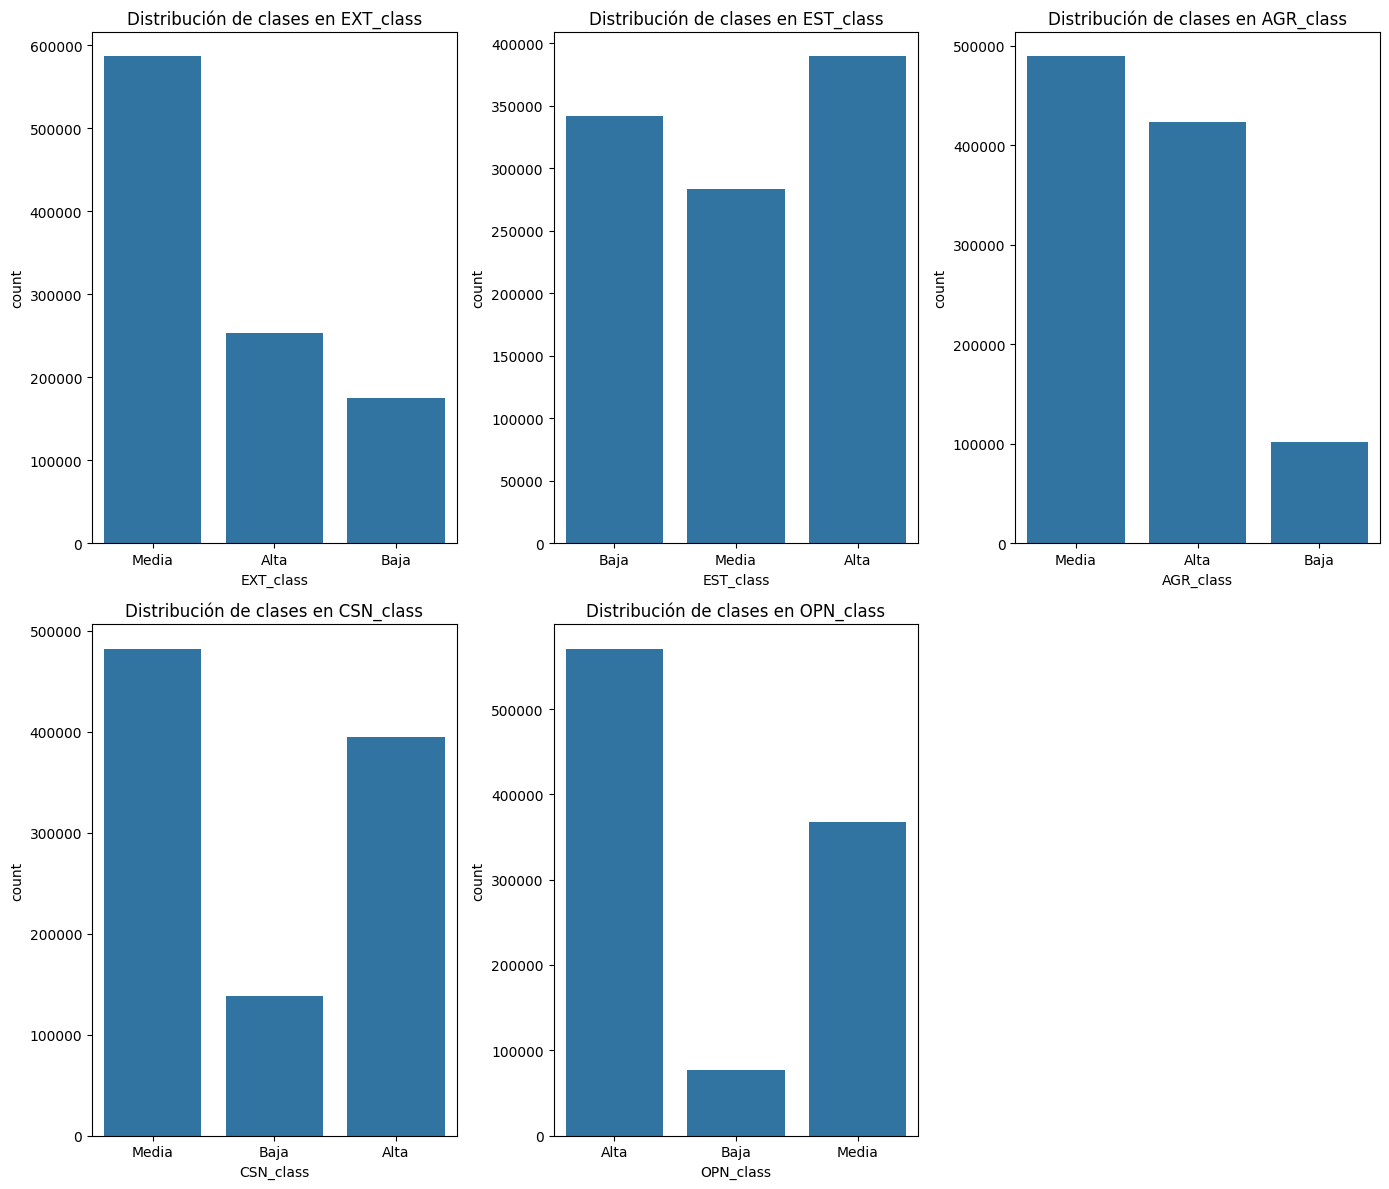

Porcentaje de clases en EXT_class:
EXT_class
Media    57.824810
Alta     24.916654
Baja     17.258537
Name: proportion, dtype: float64


Porcentaje de clases en EST_class:
EST_class
Alta     38.393308
Baja     33.696561
Media    27.910131
Name: proportion, dtype: float64


Porcentaje de clases en AGR_class:
AGR_class
Media    48.228723
Alta     41.749619
Baja     10.021658
Name: proportion, dtype: float64


Porcentaje de clases en CSN_class:
CSN_class
Media    47.513003
Alta     38.895110
Baja     13.591887
Name: proportion, dtype: float64


Porcentaje de clases en OPN_class:
OPN_class
Alta     56.208899
Media    36.250186
Baja      7.540915
Name: proportion, dtype: float64




In [44]:
# Lista de rasgos de personalidad
traits = ['EXT_class', 'EST_class', 'AGR_class', 'CSN_class', 'OPN_class']

# Crear los gráficos para cada rasgo
plt.figure(figsize=(14, 12))  # Ajustamos el tamaño de la figura

for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i)  # Crear una subfigura con 2 filas y 3 columnas
    sns.countplot(data=dataset, x=trait)
    plt.title(f'Distribución de clases en {trait}')

plt.tight_layout()  # Asegura que los gráficos no se solapen
plt.show()

# Calcular y mostrar los porcentajes de cada clase en cada rasgo
for trait in traits:
    print(f"Porcentaje de clases en {trait}:")
    print(dataset[trait].value_counts(normalize=True) * 100)  # Mostrar porcentaje multiplicando por 100
    print("\n")

Podemos ver que las clases están desbalanceadas, cabe mencionar que este desbalanceo por lo general será variable, dependerá del umbral en el que pongamos el límite de cada uno. Debido a este desbalanceo deberemos proceder de distintas formas.

Ara procedim a comparar les diferents mètriques y així poder seleccionar la més adequada.

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


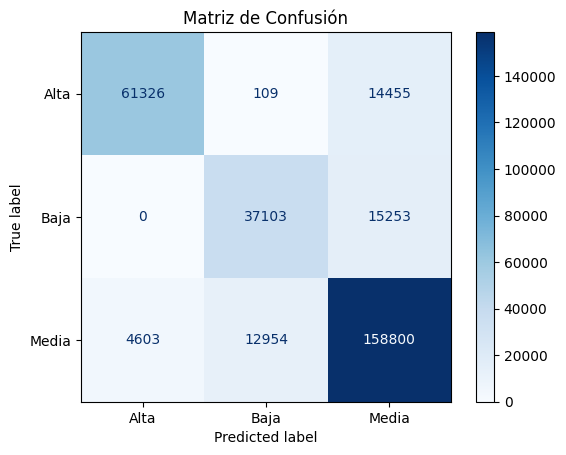

In [46]:
X = dataset.drop(columns=['EXT_avg', 'EST_avg', 'AGR_avg', 'CSN_avg', 'OPN_avg', 'EXT_class', 'EST_class', 'AGR_class', 'CSN_class', 'OPN_class'])  # Predictores

#y = dataset[['EXT_class', 'EST_class', 'AGR_class', 'CSN_class', 'OPN_class']]  # Variables de respuesta

# Dividir el conjunto de datos en 5 regresiones diferentes
y_ext = dataset['EXT_class']

"""
y_est = dataset['EST_class']
y_agr = dataset['AGR_class']
y_csn = dataset['CSN_class']
y_opn = dataset['OPN_class']

# Predecir las probabilidades para el conjunto de prueba
y_test_proba = lr.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba, pos_label=1)

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_test_proba)
print(f"AUC: {auc_score:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
"""

X_train, X_test,y_train, y_test = train_test_split(X,y_ext,test_size=0.3, random_state = 1)

lr = LogisticRegression(fit_intercept = True)
lr.fit(X,y_ext)

# Generar predicciones
y_pred = lr.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

Interpretación de la Matriz de Confusión

    Ejes:
        El eje vertical (True Label) representa las clases reales.
        El eje horizontal (Predicted Label) representa las predicciones del modelo.

    Diagonales (valores correctos):
        Alta: El modelo predijo correctamente 61,326 casos como Alta.
        Baja: El modelo predijo correctamente 37,103 casos como Baja.
        Media: El modelo predijo correctamente 158,800 casos como Media.

    Errores fuera de la diagonal:
        El modelo confundió Alta con Media en 14,455 casos.
        Confundió Media con Baja en 12,954 casos.
        No hubo errores de predicción de Baja hacia Alta.

In [47]:
def calculate_f1_score(name, model, X_train, y_train, X_test, y_test):
    lr = model
    lr.fit(X_train,y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    f1_score1 = f1_score(y_train, y_pred_train, average = 'weighted')
    f1_score2 = f1_score(y_test, y_pred_test, average = 'weighted')

    print (name, "f1_train:", round(f1_score1,5))
    print (name, "f1_test:", round(f1_score2,5))
    return f1_score2

def f1_score_comparison(models, f1_scores):
    plt.figure(figsize=(10, 6))
    plt.barh(models, f1_scores, color='skyblue')

    plt.xlabel('F1-Score')
    plt.title('Comparació de F1-Score entre Models')

    for i, v in enumerate(f1_scores):
        plt.text(v + 0.01, i, f"{v:.2f}", va='center')

    plt.tight_layout()
    plt.show()
    
def grid_graph(grid, hue=None):
    df_tmp = pd.DataFrame(pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

    df_summary = pd.DataFrame()
    mn_ts_scores = []
    for i, row in df_tmp.iterrows():
        mn_ts_scores.append(row[1])
        df_tmp = pd.DataFrame(row[0], index=[0])
        df_summary = pd.concat([df_summary, df_tmp])
    df_summary['mean test score'] = mn_ts_scores
    df_summary = df_summary.reset_index(drop=True)
    #print(df_summary.head())
    #print(df_summary.columns)
    sns.pairplot(data=df_summary, hue=hue, height=1.5, aspect=1.2)
    bplt.show()

In [48]:
X_train, X_test,y_train, y_test = train_test_split(X,y_ext,test_size=0.3, random_state = 1)
models=['Logistic Regression', "Decision Tree", 'Random Forest', 'KNN', 'SVM', 'Gradient Boosting']
f1_scores=[]

In [49]:
f1=calculate_f1_score("LogisticRegression", LogisticRegression(fit_intercept = True), X_train, y_train, X_test, y_test)
f1_scores.append(f1)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression f1_train: 0.8513
LogisticRegression f1_test: 0.85172


In [50]:
f1=calculate_f1_score("Decision Tree Classifier", DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
f1_scores.append(f1)

Decision Tree Classifier f1_train: 1.0
Decision Tree Classifier f1_test: 0.82764


In [51]:
f1=calculate_f1_score("Random Forest Classifier", RandomForestClassifier(), X_train, y_train, X_test, y_test)
f1_scores.append(f1)

KeyboardInterrupt: 

In [ ]:
f1=calculate_f1_score("KNeighbors Classifier", KNeighborsClassifier(), X_train, y_train, X_test, y_test)
f1_scores.append(f1)

In [ ]:
f1=calculate_f1_score("SVC", SVC(), X_train, y_train, X_test, y_test)
f1_scores.append(f1)

In [ ]:
f1=calculate_f1_score("Gradient Boosting Classifier", GradientBoostingClassifier(), X_train, y_train, X_test, y_test)
f1_scores.append(f1)

In [ ]:
f1_score_comparison(models, f1_scores)